In [1]:
# 이 모델은 이후에 비슷한 부류의 게임을 출시한다고 가정했을 때, 좋은 게임인지, 나쁜 게임인지 분류하는 목적을 가짐.
# tensorflow에 내장된 keras를 이용해 모바일 게임데이터를 분석 할 예정
# 데이터가 제공하는 유저가 부여한 총별점, 제공언어, 과금상품개수, 출시일, 최근업데이트일을 독립변수로 삼고
# 유저가 부여한 총별점의 평균을 종속변수로 지정할 것
# 총별점의 평균이 3.5점 이상일 경우 좋은 게임으로 판단

import pandas as pd

df = pd.read_csv('c:/data/game/appstore.csv')

In [2]:
# 'Name', 게임명 'User Rating Count', 총별점(0.0~5.0) 'Price', 가격
# 'In-app Purchases', 인앱결제 'Description', 게임설명 'Age Rating', 사용연령(4,9,12,17)
# 'Languages', 언어, 'Original Release Date', 출시일, 'Current Version Release Date' 최신버전
# 'Size' 게임용량, 단위는 바이트 



df = df.drop(['Name', 'Average User Rating(1)','Description','URL', 'ID','Subtitle', 'Icon URL',
'Developer', 'Primary Genre', 'Genres'], axis=1)


In [3]:
#원핫 인코딩(연령대)
df = pd.get_dummies(df, columns=['Age Rating'], prefix='Age Rating')

#NUll값을 0으로 대체
df = df.fillna(0)

#제공언어를 개수로 변환 후, 원래 테이블값과 치환
lan_list = []

lang=df['Languages']

#제공 언어를 개수로 변환
for a in lang.values:
    b = a.split(', ')
    lan_list.append(len(b))
    
#lan_list    
#기존 df의 값을 치환
df['Languages'] = lan_list

#인앱결제의 총 가격(가격이 클수록, 컨텐츠가 다양함)
total = []
In_app=df['In-app Purchases']
contents = In_app.values.tolist()

#인앱결제 상품 개수를 더함
for i in contents:
    if i != 0:
        total.append(len(str(i).split()))
    else:
        total.append(i)

df['In-app Purchases'] = total

from datetime import datetime, timedelta
import time

#현재시간
now = datetime.now()

#데이터프레임 형식으로 형식을 편집
type(now)

#게임 출시일이 기록된 리스트
month = []
ORD=df['Original Release Date']
contents = ORD.values.tolist()

#변경할 형식
datetime_format = '%d/%m/%Y'

#리스트 내부의 인덱스(문자열)를 날짜로 변경
for date in contents:
    datetime_result = datetime.strptime(date, datetime_format)
    month.append(datetime_result)

month[:5]

from dateutil.relativedelta import relativedelta

#개월수를 입력할 리스트
month2 = []

#개월수를 계산 후, 빈 리스트에 저장
for i in month:
    delta = relativedelta(now, i) #개월수를 셀 날짜의 범위(현재, 과거)
    result = 12*delta.years + delta.months # 연*12 + 잔여개월수 = 총개월수
    month2.append(result)

#갱신된 리스트를 데이터프레임에 저장
df['Original Release Date'] = month2

from datetime import datetime, timedelta
import time

#게임 업데이트일이 기록된 리스트
# 역수 계산 120(10년)- 업데이트개월수
month = []
CVRD=df['Current Version Release Date']
contents = CVRD.values.tolist()

#변경할 형식
datetime_format = '%d/%m/%Y'

#리스트 내부의 인덱스(문자열)를 날짜로 변경
for date in contents:
    datetime_result = datetime.strptime(date, datetime_format)
    month.append(datetime_result)

from dateutil.relativedelta import relativedelta

#개월수를 입력할 리스트
month2 = []

#개월수를 계산 후, 빈 리스트에 저장
for i in month:
    delta = relativedelta(now, i) #개월수를 셀 날짜의 범위(현재, 과거)
    result = 100 - 12*delta.years + delta.months # 연*12 + 잔여개월수 = 총개월수
    month2.append(result)

#갱신된 리스트를 데이터프레임에 저장
df['Current Version Release Date'] = month2
    

In [4]:
df.head()

,Average User Rating,Result,User Rating Count,Price,In-app Purchases,Languages,Size,Original Release Date,Current Version Release Date,Age Rating_12+,Age Rating_17+,Age Rating_4+,Age Rating_9+
0,2.0,0,0.0,0.0,0,2,26074112.0,63,74,0,0,1,0
1,4.0,1,42.0,0.0,4,2,90423296.0,57,58,1,0,0,0
2,4.5,1,9146.0,0.0,9,8,198654976.0,37,81,0,0,1,0
3,4.5,1,595.0,0.0,7,11,60456960.0,54,58,0,0,0,1
4,4.5,1,1930.0,0.0,2,13,48525312.0,53,82,0,0,1,0


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


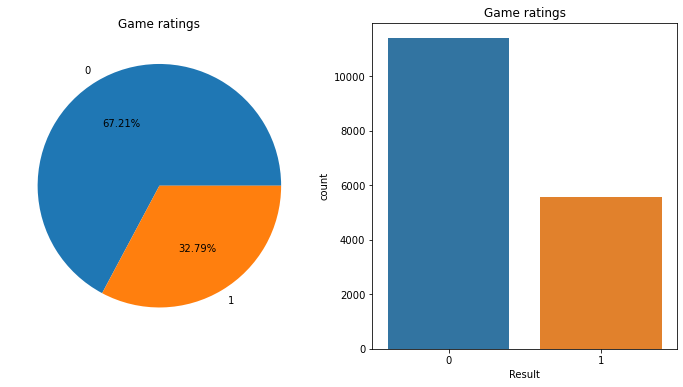

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(12,6))
df['Result'].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('Game ratings')
ax[0].set_ylabel('')
sns.countplot('Result', data=df, ax=ax[1])
ax[1].set_title('Game ratings')
plt.show()

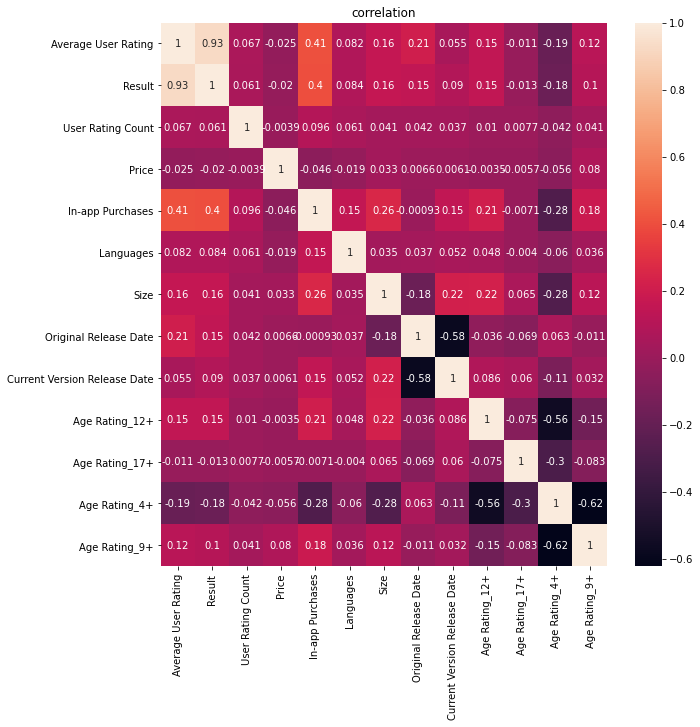

In [6]:
#상관관계 분석
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linecolor='white')
plt.title('correlation')
plt.show()

#인앱결제여부는 양의 상관관계
#사용연령 중 4세이용 게임은 음의 상관관계

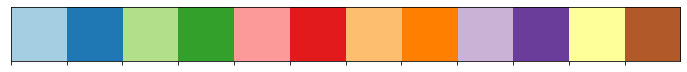

In [58]:
palette1 = sns.color_palette("Paired")
sns.palplot(palette1)

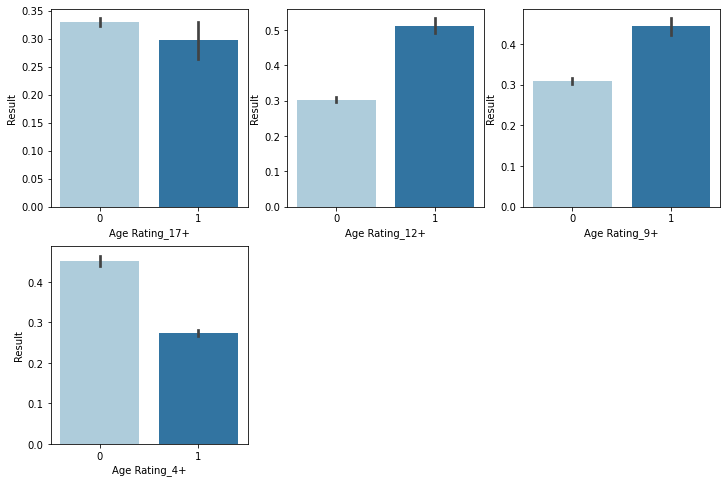

In [60]:
#게임 이용 연령대를 나눠서 분석

#막대 위의 세로선은 오차범위를 의미함(default: ci=95)

plt.figure(figsize=[12,8])
plt.subplot(231)
sns.barplot(x='Age Rating_17+', y='Result', data=df, palette=palette1)
plt.subplot(232)
sns.barplot(x='Age Rating_12+', y='Result', data=df, palette=palette1)
plt.subplot(233)
sns.barplot(x='Age Rating_9+', y='Result', data=df, palette=palette1)
plt.subplot(234)
sns.barplot(x='Age Rating_4+', y='Result', data=df, palette=palette1)


plt.show()
#12세~9세 게임의 좋음 평가가 우세함

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Rating count')

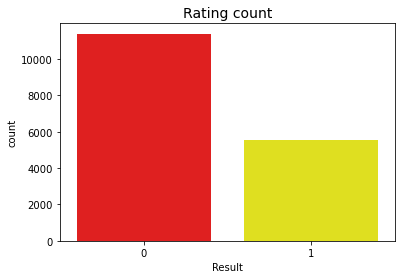

In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

colors = ['red', 'yellow']
sns.countplot('Result', data=df, palette=colors)
plt.title('Rating count', fontsize=14)
#불규칙 데이터셋

In [9]:
train_cols = df.columns[2:]
X = df[train_cols]
y = df['Result']

In [10]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Result'])
df2 = pd.concat([X_samp, y_samp], axis=1)

In [11]:
#데이터셋 구분(8:2)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13557, 11), (3390, 11), (13557,), (3390,))

In [12]:
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense

#모델 생성
model = Sequential()
#노드개수 64, 독립변수 개수 ,활성화함수 relu
model.add(Dense(64, input_shape=(len(X_train.columns),), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


['c:/data/game/games.model']

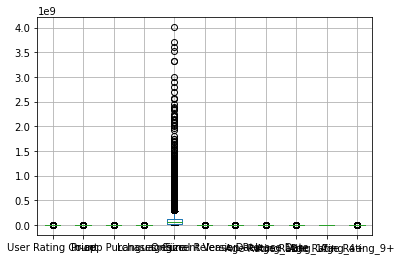

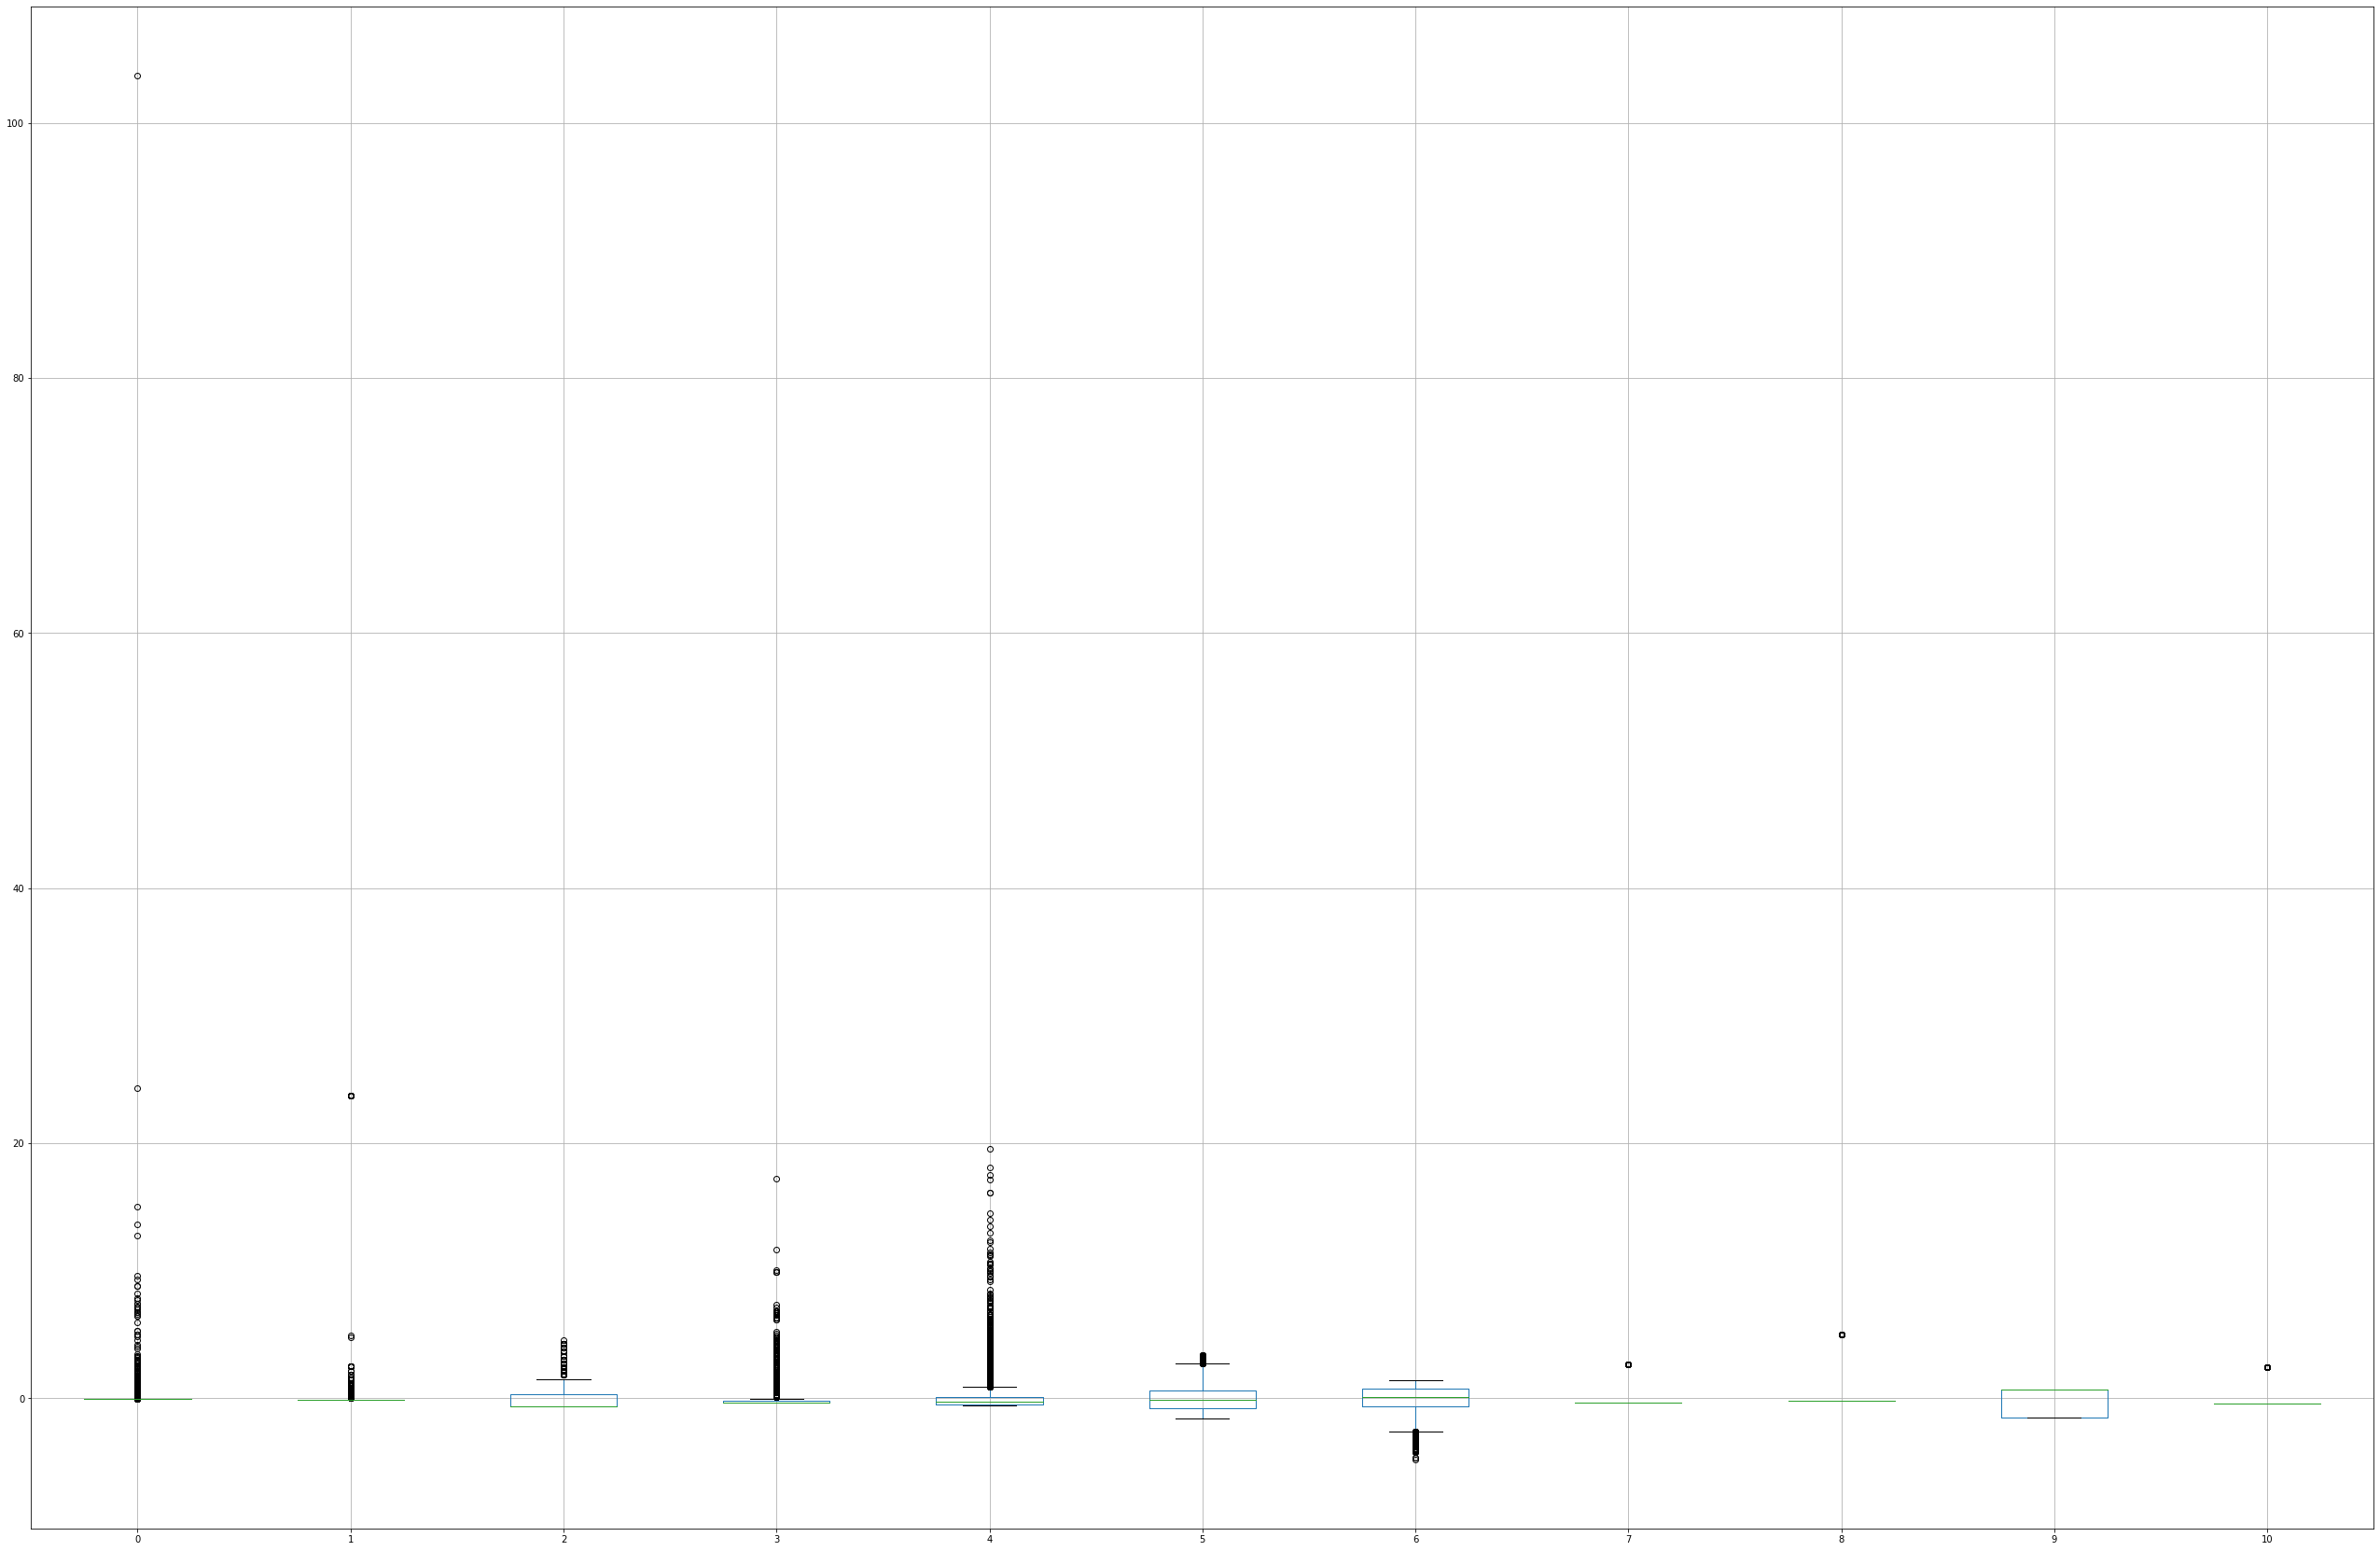

In [13]:
X_train.boxplot()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #평균0, 표준편차 1
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#넘파이 배열로 바뀜
#기계학습을 위해 넘파이 배열 => 데이터프레임
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

plt.figure(figsize=(45,30))
X_train_scaled.boxplot()

from joblib import dump
dump(scaler, 'c:/data/game/games.model', compress=True)

In [14]:
#모델 학습
hist = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
424/424 [==============================] - 3s 3ms/step - loss: 279237.1875 - accuracy: 0.5050
Epoch 2/10
424/424 [==============================] - 1s 3ms/step - loss: 171268.3281 - accuracy: 0.5107
Epoch 3/10
424/424 [==============================] - 1s 3ms/step - loss: 171310.3438 - accuracy: 0.5174
Epoch 4/10
424/424 [==============================] - 1s 3ms/step - loss: 153330.7188 - accuracy: 0.5038
Epoch 5/10
424/424 [==============================] - 1s 3ms/step - loss: 111816.7109 - accuracy: 0.5103
Epoch 6/10
424/424 [==============================] - 2s 4ms/step - loss: 147201.7812 - accuracy: 0.5130
Epoch 7/10
424/424 [==============================] - 1s 3ms/step - loss: 137655.6094 - accuracy: 0.5154
Epoch 8/10
424/424 [==============================] - 1s 3ms/step - loss: 100961.4453 - accuracy: 0.5116
Epoch 9/10
424/424 [==============================] - 2s 4ms/step - loss: 99111.7422 - accuracy: 0.5215
Epoch 10/10
424/424 [==============================] - 1

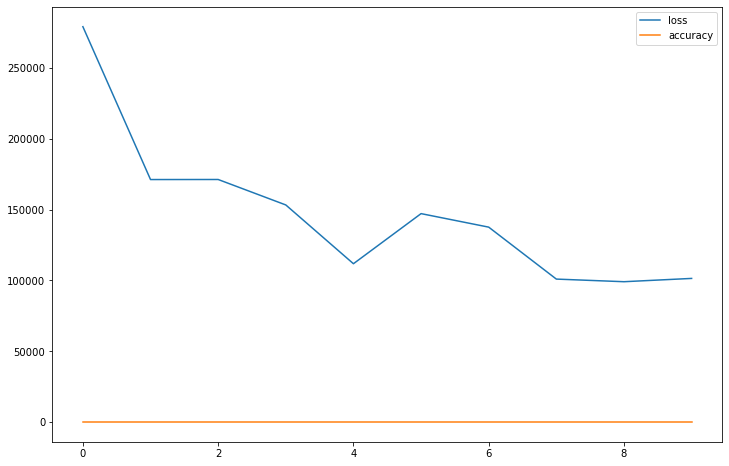

In [15]:
#loss는 손실, 학습할수록 생기는 오차는 점점 줄어듦
#accuracy는 정확도, 학습할수록 정확도는 점점 증가함

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.legend(['loss', 'accuracy'])
plt.show()

In [16]:
#모델 평가
scores = model.evaluate(X_train_scaled, y_train, verbose=1)
print(scores)
print('%s: %.2f%%' %(model.metrics_names[1],
scores[1]*100)) #학습용

scores = model.evaluate(X_test_scaled, y_test, verbose=1)
print(scores)
print('%s: %.2f%%' %(model.metrics_names[1], scores[1]*100)) #검증용

424/424 [==============================] - 1s 2ms/step - loss: 1.0435 - accuracy: 0.6735
[1.0435054302215576, 0.6735265851020813]
accuracy: 67.35%
106/106 [==============================] - 0s 2ms/step - loss: 1.0521 - accuracy: 0.6735
[1.0521315336227417, 0.67345130443573]
accuracy: 67.35%


In [17]:

#새로운 값 예측 [총별점, 가격, 과금상품개수, 제공언어, 게임용량, 출시일, 최근업데이트일, 12, 17, 4, 9]
game1 = [[500, 3.99, 4, 2, 30000000, 60, 10, 0, 0, 1, 0]]
game2 = [[1000,1.99,6,3, 25000000,24,5,1,0,0,0]]
game3 = [[700,0,8,1, 35000000, 36,18,0,1,0,0]]

#t스케일링을 해야 할 경우
game1 = scaler.transform(game1)
game2 = scaler.transform(game2)
game3 = scaler.transform(game3)


print(model.predict(game1))
print(model.predict(game2))
print(model.predict(game3))

[[0.04974975]]
[[0.617939]]
[[0.11142376]]


In [18]:
#모형을 지정 디렉토리에 저장
model.save('c:/data/game/games2.model')

INFO:tensorflow:Assets written to: c:/data/game/games2.model\assets
